In [7]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

centers = [[1,1],[-1,-1],[1,-1]]
x,labels_true = make_blobs(
    n_samples=750,
    centers=centers,
    cluster_std=0.4,
    random_state=0
)

x = StandardScaler().fit_transform(x)
df = pd.DataFrame({"f1":x[:,0],"f2":x[:,1]})
df.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


<Axes: xlabel='f1', ylabel='f2'>

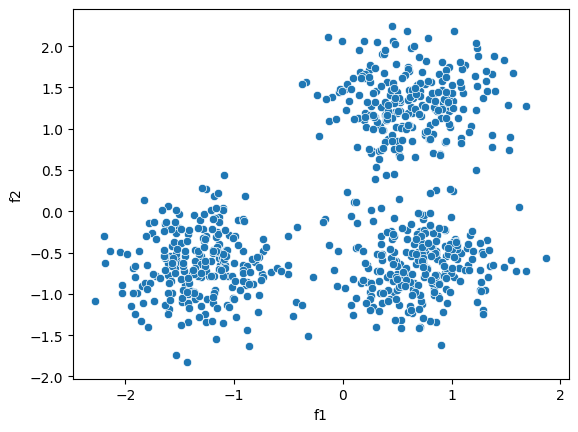

In [8]:
sns.scatterplot(df,x='f1',y='f2')

In [9]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=10)
model.fit(df[['f1','f2']])
model.labels_

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

here -1 is the noise points in the dataset

In [10]:
list(model.labels_).count(-1)

18

In [11]:
df['cluster'] = model.labels_

<Axes: xlabel='f1', ylabel='f2'>

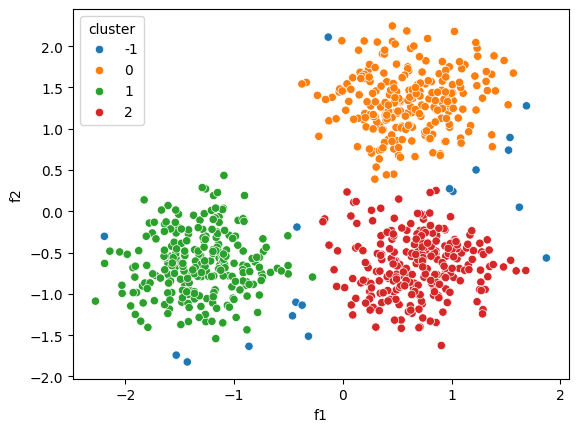

In [14]:
sns.scatterplot(df,x='f1',y='f2',hue='cluster',palette='tab10')

In [15]:
df = pd.read_excel('../data/income2.xlsx')

In [16]:
df

,Name,Age,Income (Thousands $)
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87
5,David,48,68
6,Ismail,31,80
7,Sheela,55,60


<Axes: xlabel='Age', ylabel='Income (Thousands $)'>

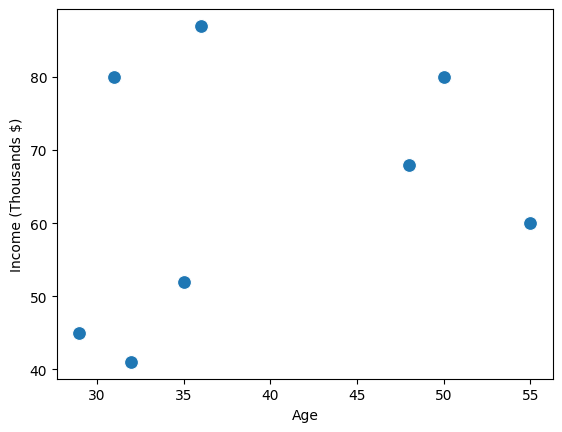

In [18]:
sns.scatterplot(df,x='Age',y='Income (Thousands $)',s=100)

In [32]:
model = DBSCAN(eps=11,min_samples=2)
model.fit(df[['Age','Income (Thousands $)']])
model.labels_

array([ 0, -1,  0,  0,  1,  2,  1,  2])

<Axes: xlabel='Age', ylabel='Income (Thousands $)'>

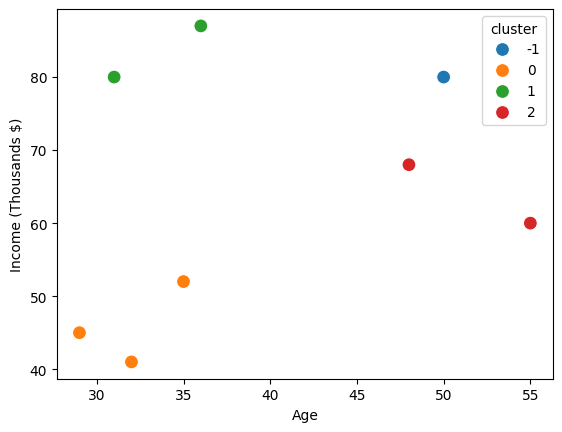

In [33]:
df['cluster'] = model.labels_

sns.scatterplot(df,x='Age',y='Income (Thousands $)',s=100,hue='cluster',palette='tab10')